(599, 759)

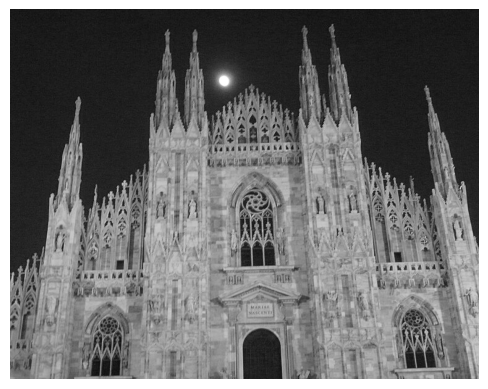

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.image import imread

image_path = 'Milan_duomo.jpg'
img = imread(image_path)
A = np.mean(np.array(img, dtype = np.float64)/255, axis = -1)
plt.imshow(A, cmap = 'gray')
plt.axis('off')
A.shape

1. Compute the SVD associated with the picture, by using the standard algorithm, that gives the exact (up
    to round-off errors) decomposition. Then, plot the trend w.r.t. i of the singular values σi
    . 
    Then, repeat
    the computation by considering the randomized SVD algorithm of rank k = 25, 50, 100, 200 and 400 . Plot
    the approximate singular values together with the exact singular values. Comment what you see.

In [5]:
U, s, VT = np.linalg.svd(A, full_matrices=False)

Text(0.5, 1.0, 'Singular values trend')

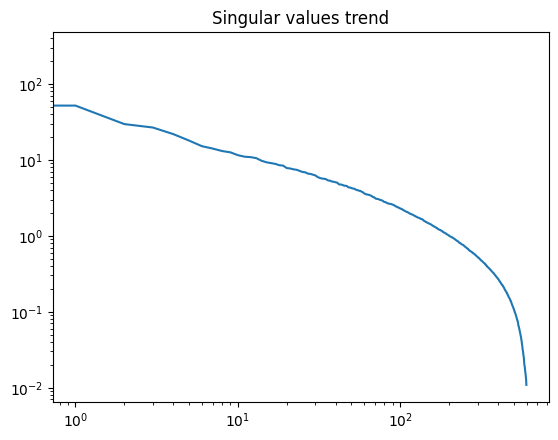

In [6]:
plt.loglog(s)
plt.title("Singular values trend in loglog")

Text(0.5, 1.0, 'Singular values trend in loglog')

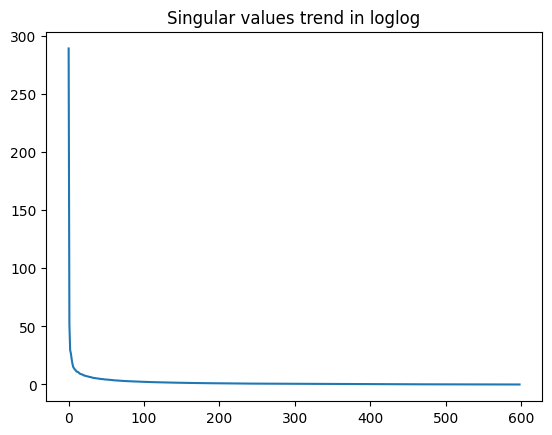

In [7]:
plt.plot(s)
plt.title("Singular values trend in loglog")

In [8]:
def rsvd(A,k):
    m,n = A.shape
    omega = np.random.randn(n,k)
    Y = A @ omega
    Q,R = np.linalg.qr(Y)
    B = Q.transpose() @ A
    Ub, s, VT = np.linalg.svd(B, full_matrices= False)
    U = Q @ Ub
    return U, s, VT

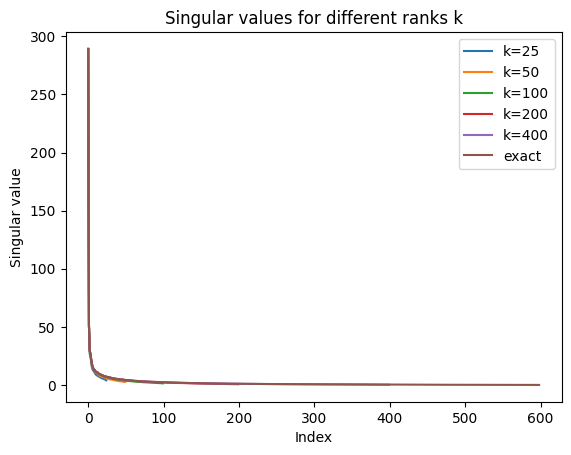

In [11]:
values = [25, 50, 100, 200, 400]
different_sigmas_for_k = []

for i in range(len(values)):
    Ui, si, VTi = rsvd(A,values[i])
    different_sigmas_for_k.append({"value": values[i], "sigma": si})

# Plot each set of singular values on the same graph
for item in different_sigmas_for_k:
    k = item["value"]
    sigma = item["sigma"]
    plt.plot(sigma, label=f'k={k}')
plt.plot(s, label='exact')
plt.xlabel('Index')
plt.ylabel('Singular value')
plt.legend()
plt.title('Singular values for different ranks k')
plt.show()

Comments about the result:

The singular values exhibit a rapid decay initially, indicating that the first few singular values capture most of the significant information in the image.

The randomized SVD approximates the exact SVD well, especially for lower values of k. The largest singular values are very similar between the exact and randomized methods,

The reconstruction error decreases with increasing k, indicating that higher ranks provide better approximations of the original image. This trend is expected, as more information is captured with higher ranks.

----------------------------------------------------

2) We now want to compress the image.

Use the exact SVD to perform image compression for rank k = 25, 50, 100, 200 and 400. Plot the compressed image and compute the reconstruction error as a function of k (use the matrix p-norm with p = 2).
Repeat the same exercise by using the randomized SVD algorithm.
Repeat the same exercise by using the randomized SVD algorithm with a +50% oversampling, that is by increasing by 50% the number of columns in the matrix random P (round the quantity 1.5k to the closest integer).
Finally, plot the trend of the reconstruction error of the dataset as a function of k in the three cases. Comment on the results

In [15]:
def reconstruction_error(X):
    return np.linalg.norm(A-X)/np.linalg.norm(A)

Text(0.5, 1.0, 'Real')

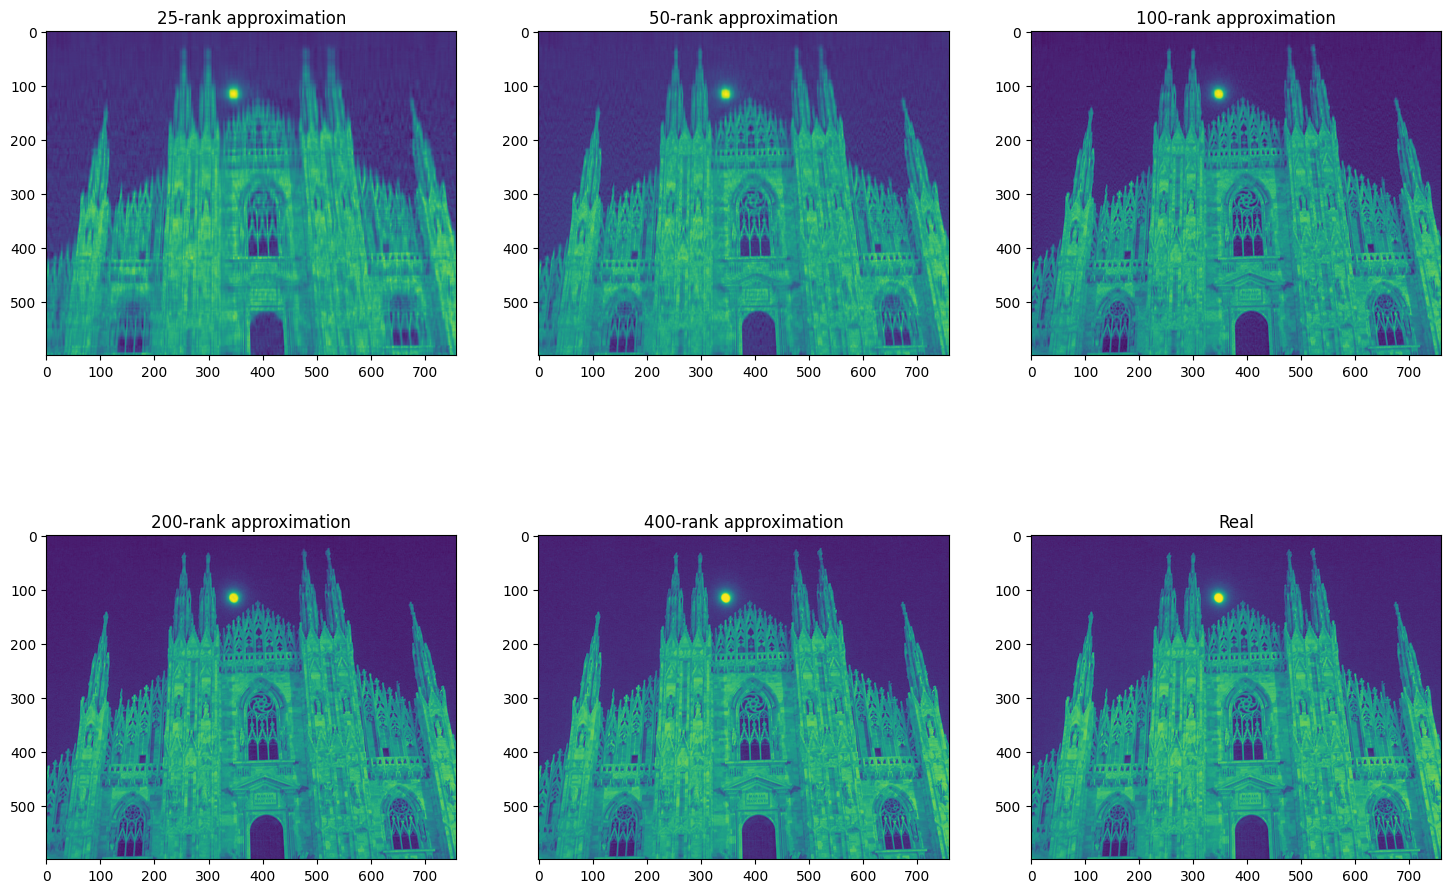

In [26]:
#using exact svd

fig, axs = plt.subplots(2,3, figsize=(18,12))
axs = axs.flatten()
U, s, VT = np.linalg.svd(A, full_matrices=False)

history_reconstruction_error = []
for i in range(len(values)):
    k = values[i]
    SigmaK = np.diag(s)
    Ak = U[:,:k] @ SigmaK[:k, :k] @ VT[:k,:]
    axs[i].imshow(Ak)
    axs[i].set_title("%d-rank approximation" %k)
    history_reconstruction_error.append(reconstruction_error(Ak))

axs[5].imshow(A)
axs[5].set_title("Real")


Text(0.5, 1.0, 'Real')

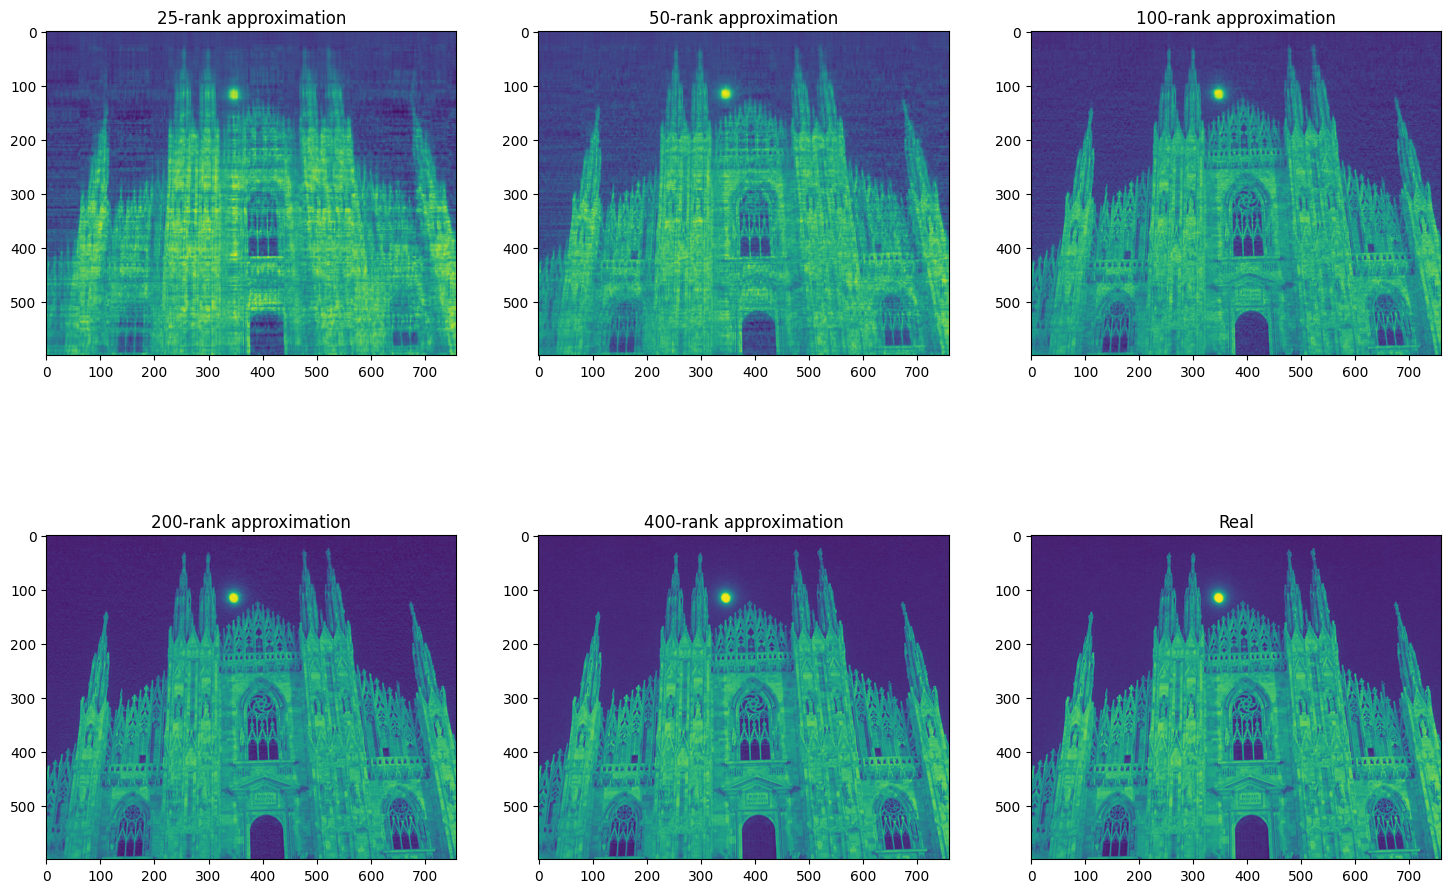

In [23]:
#using rsvd

fig, axs = plt.subplots(2,3, figsize=(18,12))
axs = axs.flatten()

history_reconstruction_error_rsvd = []
for i in range(len(values)):
    k = values[i]
    Uk, sk, VTk = rsvd(A, k)
    SigmaK = np.diag(sk)
    Ak = Uk @ SigmaK @ VTk
    axs[i].imshow(Ak)
    axs[i].set_title("%d-rank approximation" %k)
    history_reconstruction_error_rsvd.append(reconstruction_error(Ak))

axs[5].imshow(A)
axs[5].set_title("Real")

In [24]:
round(1.5)

2

Text(0.5, 1.0, 'Real')

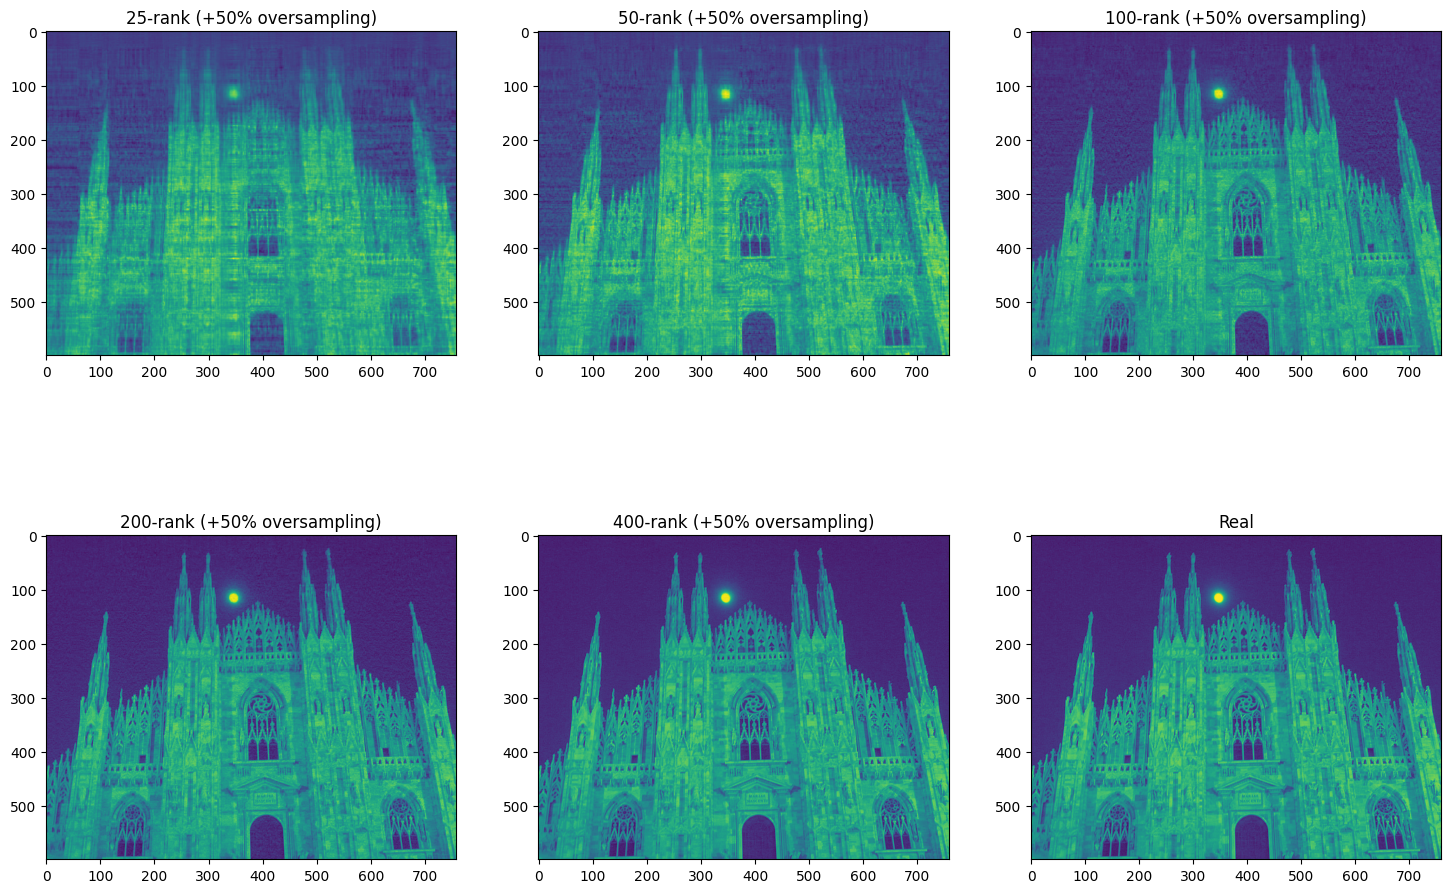

In [28]:
#using rsvd plus 50% oversampling

fig, axs = plt.subplots(2,3, figsize=(18,12))
axs = axs.flatten()

history_reconstruction_error_rsvd_oversample = []
for i in range(len(values)):
    k = values[i]
    oversample_k = int(1.5 * k)    
    Uk, sk, VTk = rsvd(A, k)
    SigmaK = np.diag(sk[:k])
    Ak = Uk[:, :k] @ SigmaK @ VTk[:k, :]
    axs[i].imshow(Ak)
    axs[i].set_title("%d-rank (+50%% oversampling)" % k)
    history_reconstruction_error_rsvd_oversample.append(reconstruction_error(Ak))

axs[5].imshow(A)
axs[5].set_title("Real")

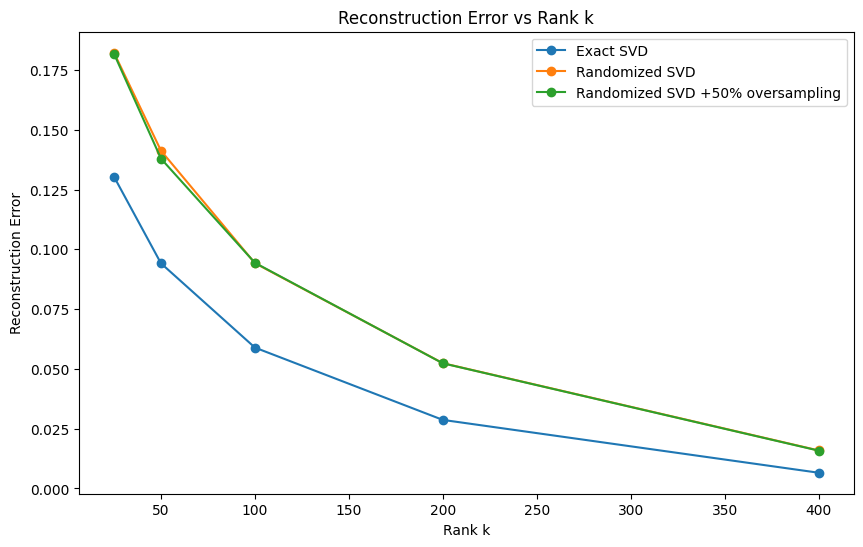

In [29]:
plt.figure(figsize=(10,6))
plt.plot(values, history_reconstruction_error, label='Exact SVD', marker='o')
plt.plot(values, history_reconstruction_error_rsvd, label='Randomized SVD', marker='o')
plt.plot(values, history_reconstruction_error_rsvd_oversample, label='Randomized SVD +50% oversampling', marker='o')
plt.xlabel('Rank k')
plt.ylabel('Reconstruction Error')
plt.title('Reconstruction Error vs Rank k')
plt.legend()
plt.show()

As we can see, by increasing k, the error is decreasing a lot. The exact svd remains the best among the different cases

3) Evaluate the time needed to compute the SVD with the three approaches (SVD, randomized SVD, randomized SVD with oversampling) in the case k = 200.

In [33]:
%timeit np.linalg.svd(A, full_matrices=True)

315 ms ± 16.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [34]:
%timeit np.linalg.svd(A, full_matrices=False)

404 ms ± 84.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [31]:
%timeit rsvd(A, 200)

157 ms ± 15.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [32]:
%timeit rsvd(A, int(1.5*200))

270 ms ± 18.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
